In [1]:
import numpy as np
import pandas as pd
import rasterio
import matplotlib.pyplot as plt
import georaster
from importlib import reload
# import cv2
from affine import Affine
from pyproj import Proj, transform
# from osgeo import gdal
# from osgeo import osr

import utils

from mpl_toolkits.basemap import Basemap

In [2]:
# !gdalinfo livingston.tif

In [3]:
FPATH = 'livingston.tif'
img = rasterio.open(FPATH)
print(f"shape: {img.shape}")
print(f"block_shapes: {img.block_shapes}")
print(f"crs: {img.crs}")
print(f"count (bands): {img.count}")
print(f"indexes: {img.indexes}")
print(f"driver: {img.driver}")
print(f"is_tiled: {img.is_tiled}")
print(f"transform: {img.transform}")
print(f"bounds: {img.bounds}")
print(f"scales: {img.scales}")
print(f"profile: {img.profile}")

# print(dir(img))

shape: (68398, 69395)
block_shapes: [(256, 256), (256, 256), (256, 256)]
crs: EPSG:2898
count (bands): 3
indexes: (1, 2, 3)
driver: GTiff
is_tiled: True
transform: | 2.00, 0.00, 13176690.03|
| 0.00,-2.00, 471033.21|
| 0.00, 0.00, 1.00|
bounds: BoundingBox(left=13176690.03028731, bottom=334237.2135082334, right=13315480.03028731, top=471033.2135082334)
scales: (1.0, 1.0, 1.0)
profile: {'driver': 'GTiff', 'dtype': 'uint8', 'nodata': 80.0, 'width': 69395, 'height': 68398, 'count': 3, 'crs': CRS.from_epsg(2898), 'transform': Affine(2.0, 0.0, 13176690.03028731,
       0.0, -2.0, 471033.2135082334), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'interleave': 'pixel'}


In [4]:
img.xy(0, 0)

(13176691.03028731, 471032.2135082334)

In [22]:

def get_latlon(trnsfrm, row, col, proj=img.crs):
    """ TODO 
    
    https://gis.stackexchange.com/questions/129847/obtain-coordinates-and-corresponding-pixel-values-from-geotiff-using-python-gdal
    """
    # upper-left pixel corner affine transform
    p1 = Proj(proj)

    # Get affine transform for pixel centres
    T1 = trnsfrm * Affine.translation(0.5, 0.5)

    # Project all longitudes, latitudes
    p2 = Proj(proj='latlong', datum='WGS84')

    # get pixel point values from position in
    # matrix
    x, y = img.xy(row, col)
    

    lon, lat = transform(p1, p2, x, y)
    return lat, lon


get_latlon(img.transform, 0, 0)

(42.792356570263266, -84.16796309552618)

In [9]:
def get_window(img, x_offset=0, y_offset=0, 
               side_len=1000):
    """ TODO """
    window = rasterio.windows.Window(x_offset, y_offset, 
                                     side_len, side_len)
    subset = img.read(window=window)    
    return subset, window

In [17]:
print(f"shape: {img.shape}")

shape: (68398, 69395)


row, column: 30000, 30000
lat, lon: 42.62710937950923, -83.9455346157804



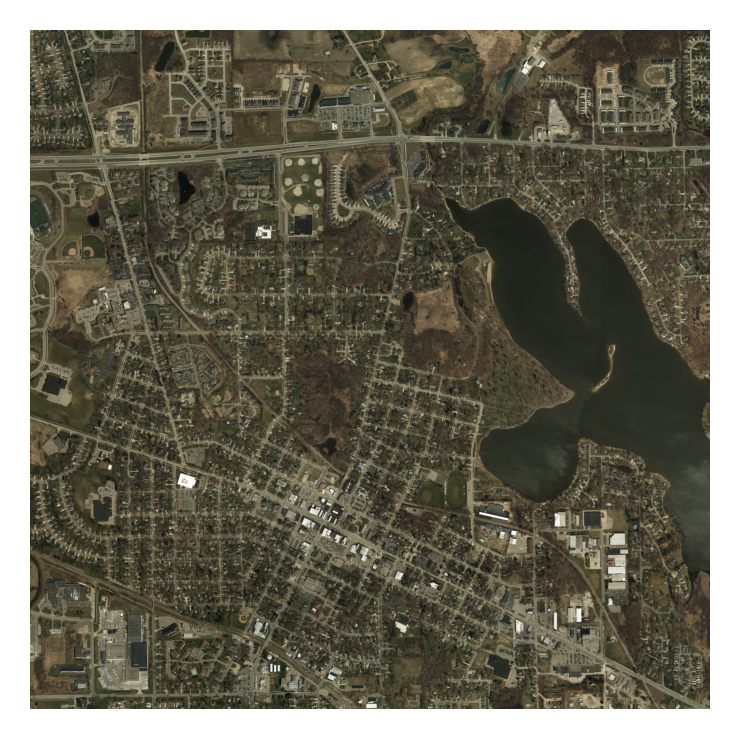

In [42]:
"""
plot subsets
"""

img_row = 30000
img_col = 30000

side_len = 5000
N_RANGE = 1

for i in range(N_RANGE):

    _x = img_row + (i * side_len)
    _y = img_col

    clip, win = get_window(img, x_offset=_x, y_offset=_y, side_len=side_len)

    # get window_specific transformation
    win_transform = img.window_transform(win)
    # print(win_transform)

    lat, lon = get_latlon(win_transform, _x, _y)
    print(f"row, column: {_x}, {_y}")
    print(f"lat, lon: {lat}, {lon}")
    print()

    fig = utils.build_fig(size=(3,3), axis_off=True)
    plt.imshow(np.moveaxis(clip, 0, 2), cmap=plt.cm.Greens_r)
    plt.savefig(f"TEST_{lat}_{lon}.png")

In [28]:
# def get_latlon(img, lat, lon, side_len):
#     """ TODO """

#     # Get pixel coordinates from map coordinates
#     py, px = img.index(lon, lat)

#     print(f'Pixel X, Y coords: {px}, {py}')

#     window = rasterio.windows.Window(px, py, side_len, side_len)
#     clip = img.read(window=window)
#     # re-order RGB channels
#     plot_clip = np.moveaxis(clip, 0, 2)

#     print(type(plot_clip))
#     print(plot_clip.shape)

    # fig = utils.build_fig(size=(3,3), axis_off=True)
    # plt.imshow(plot_clip)

    # meta = img.meta
    # meta['width'], meta['height'] = side_len, side_len
    # meta['transform'] = rasterio.windows.transform(window, img.transform)

    # outfile = 'test1.tif'

    # with rasterio.open(outfile, 'w', **meta) as dst:
    #     dst.write(clip)



# get_latlon(img, 42.621595, -83.995212, side_len=1000)

In [17]:
# dir(my_image)
# print(my_image)

In [9]:
# help(Basemap)
pass